In [1]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target
)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full
)

In [2]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)


In [3]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras


2022-04-27 14:17:20.081858: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-04-27 14:17:20.081877: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [4]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])
model.compile(loss="mean_squared_error", optimizer="sgd")

2022-04-27 14:17:22.749983: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-27 14:17:22.750646: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-04-27 14:17:22.750703: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory
2022-04-27 14:17:22.750745: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory
2022-04-27 14:17:22.750784: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Co

In [5]:
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 1.2151 - val_loss: 10.5420
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 88.9235 - val_loss: 1.0447
Epoch 3/20
363/363 [==============================] - 1s 1ms/step - loss: 0.6015 - val_loss: 0.4592
Epoch 4/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4410 - val_loss: 0.4056
Epoch 5/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4037 - val_loss: 0.3868
Epoch 6/20
363/363 [==============================] - 1s 1ms/step - loss: 0.3863 - val_loss: 0.3742
Epoch 7/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3752 - val_loss: 0.3669
Epoch 8/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3678 - val_loss: 0.3614
Epoch 9/20
363/363 [==============================] - 1s 1ms/step - loss: 0.3627 - val_loss: 0.3577
Epoch 10/20
363/363 [==============================] - 1s 1ms/step - loss: 0.3594 - val_loss: 0.36

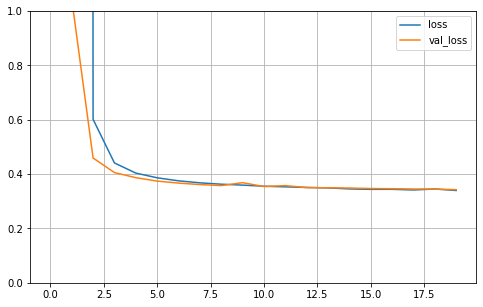

In [6]:
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [7]:
mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)

162/162 [==============================] - 0s 1ms/step - loss: 0.6001


In [8]:
y_pred

array([[2.091356  ],
       [3.4265928 ],
       [0.71356547]], dtype=float32)

In [9]:
# functional api
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation="relu")(input_)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_, hidden2])
output = keras.layers.Dense(1)(concat)

model = keras.models.Model(inputs=input_, outputs=output)

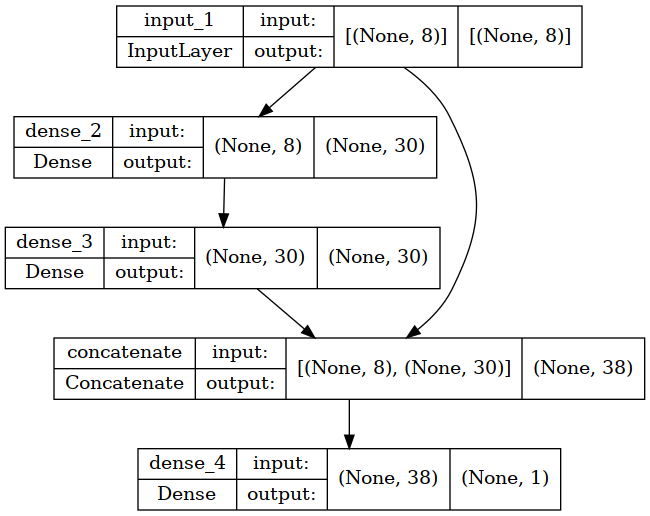

In [10]:
keras.utils.plot_model(model, show_shapes=True)

In [12]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 8)]          0           []                               
                                                                                                  
 dense_2 (Dense)                (None, 30)           270         ['input_1[0][0]']                
                                                                                                  
 dense_3 (Dense)                (None, 30)           930         ['dense_2[0][0]']                
                                                                                                  
 concatenate (Concatenate)      (None, 38)           0           ['input_1[0][0]',                
                                                                  'dense_3[0][0]']            

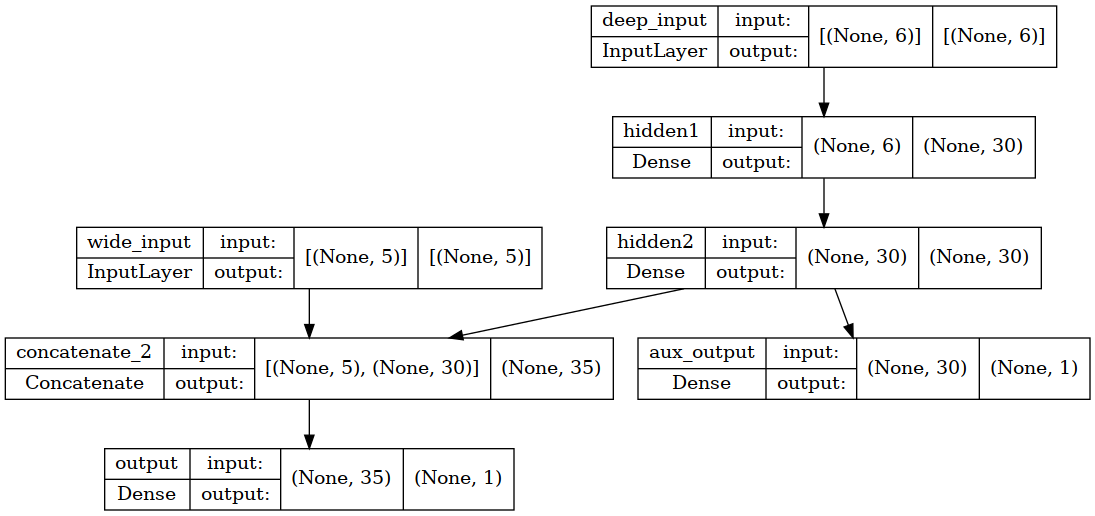

In [14]:
input_a = keras.layers.Input(shape=[5], name="wide_input")
input_b = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu", name="hidden1")(input_b)
hidden2 = keras.layers.Dense(30, activation="relu", name="hidden2")(hidden1)
concat = keras.layers.concatenate([input_a, hidden2])
output = keras.layers.Dense(1, name="output")(concat)
aux_output = keras.layers.Dense(1, name="aux_output")(hidden2)
model = keras.models.Model(inputs=[input_a, input_b], outputs=[output, aux_output])
keras.utils.plot_model(model, show_shapes=True)

In [15]:
# subclassing API to build dynamic models
class WideAndDeepModel(keras.Model):
    def __init__(self, units=30, activation="relu", **kwargs):
        super().__init__(**kwargs)
        self.hidden1 = keras.layers.Dense(units, activation=activation)
        self.hidden2 = keras.layers.Dense(units, activation=activation)
        self.main_output = keras.layers.Dense(1)
        self.aux_output = keras.layers.Dense(1)


    def call(self, inputs):
        input_a, input_b = inputs
        hidden1 = self.hidden1(input_b)
        hidden2 = self.hidden2(hidden1)
        concat = keras.layers.concatenate([input_a, hidden2])
        main_output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return main_output, aux_output

In [16]:
model = WideAndDeepModel()

In [20]:
#model.build((None, 5))
#keras.utils.plot_model(model, show_shapes=True)